In [78]:
import pandas as pd 
import os

In [79]:
problem_number = 8
files_in_dir = os.listdir(f'results_maxcut_{problem_number}/optimal')
files_in_dir = [file for file in files_in_dir if file.endswith('.csv')]
files_in_dir[:5]

['results_optimal_1_100.csv',
 'results_optimal_25_100.csv',
 'results_optimal_8_100.csv',
 'results_optimal_9_100.csv',
 'results_optimal_12_100.csv']

In [80]:
max_layers = 30
repetition = 100
dfs = []
for layer in range(1, max_layers+1):
    file_name = f'results_optimal_{layer}_{repetition}.csv'
    if file_name in files_in_dir:
        df = pd.read_csv(f'results_maxcut_{problem_number}/optimal/{file_name}')
        dfs.append(df)

In [81]:
dfs[0].head()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 0, 1, 1, 0, 0, 0], -92.0), ([0, 0, 1,...","[array([2.316814 , 3.37068251]), array([1.018...","[9.587641716003418, 5.409739971160889, 6.21333..."


In [82]:
import QAOA_Tester as qtee

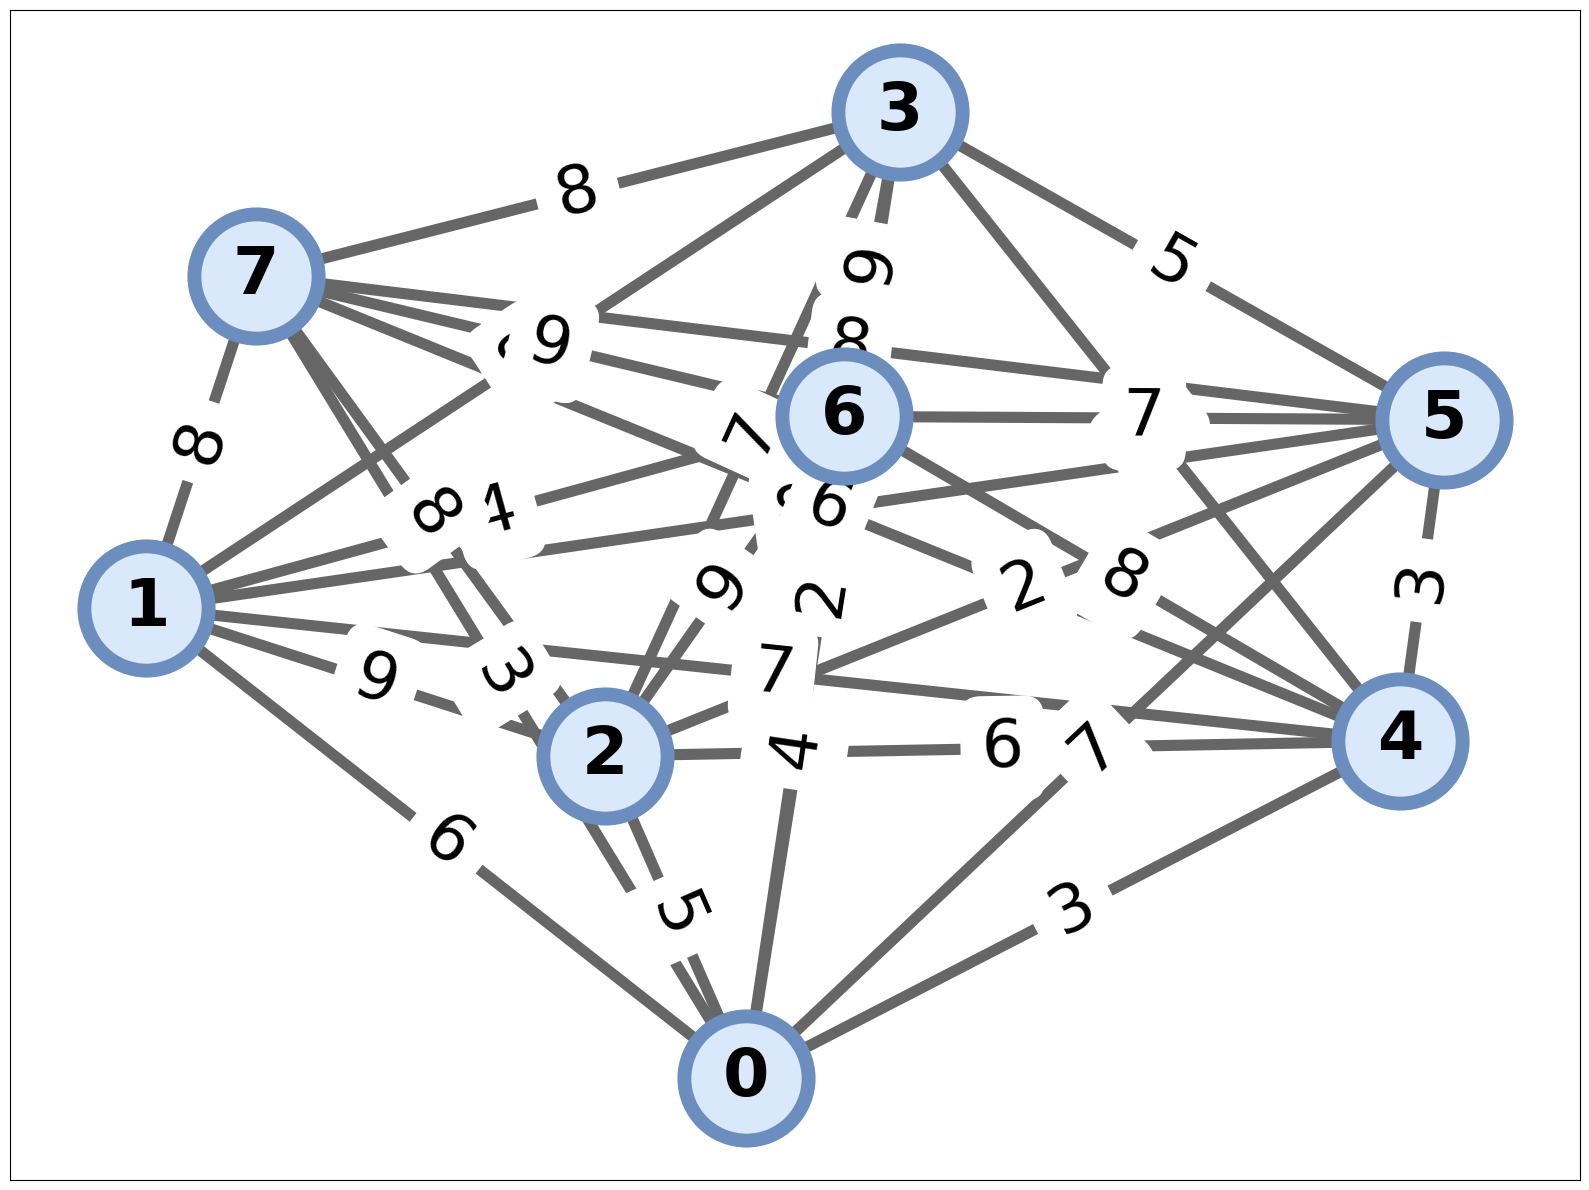

[0, 0, 1, 1, 1, 1, 0, 0]


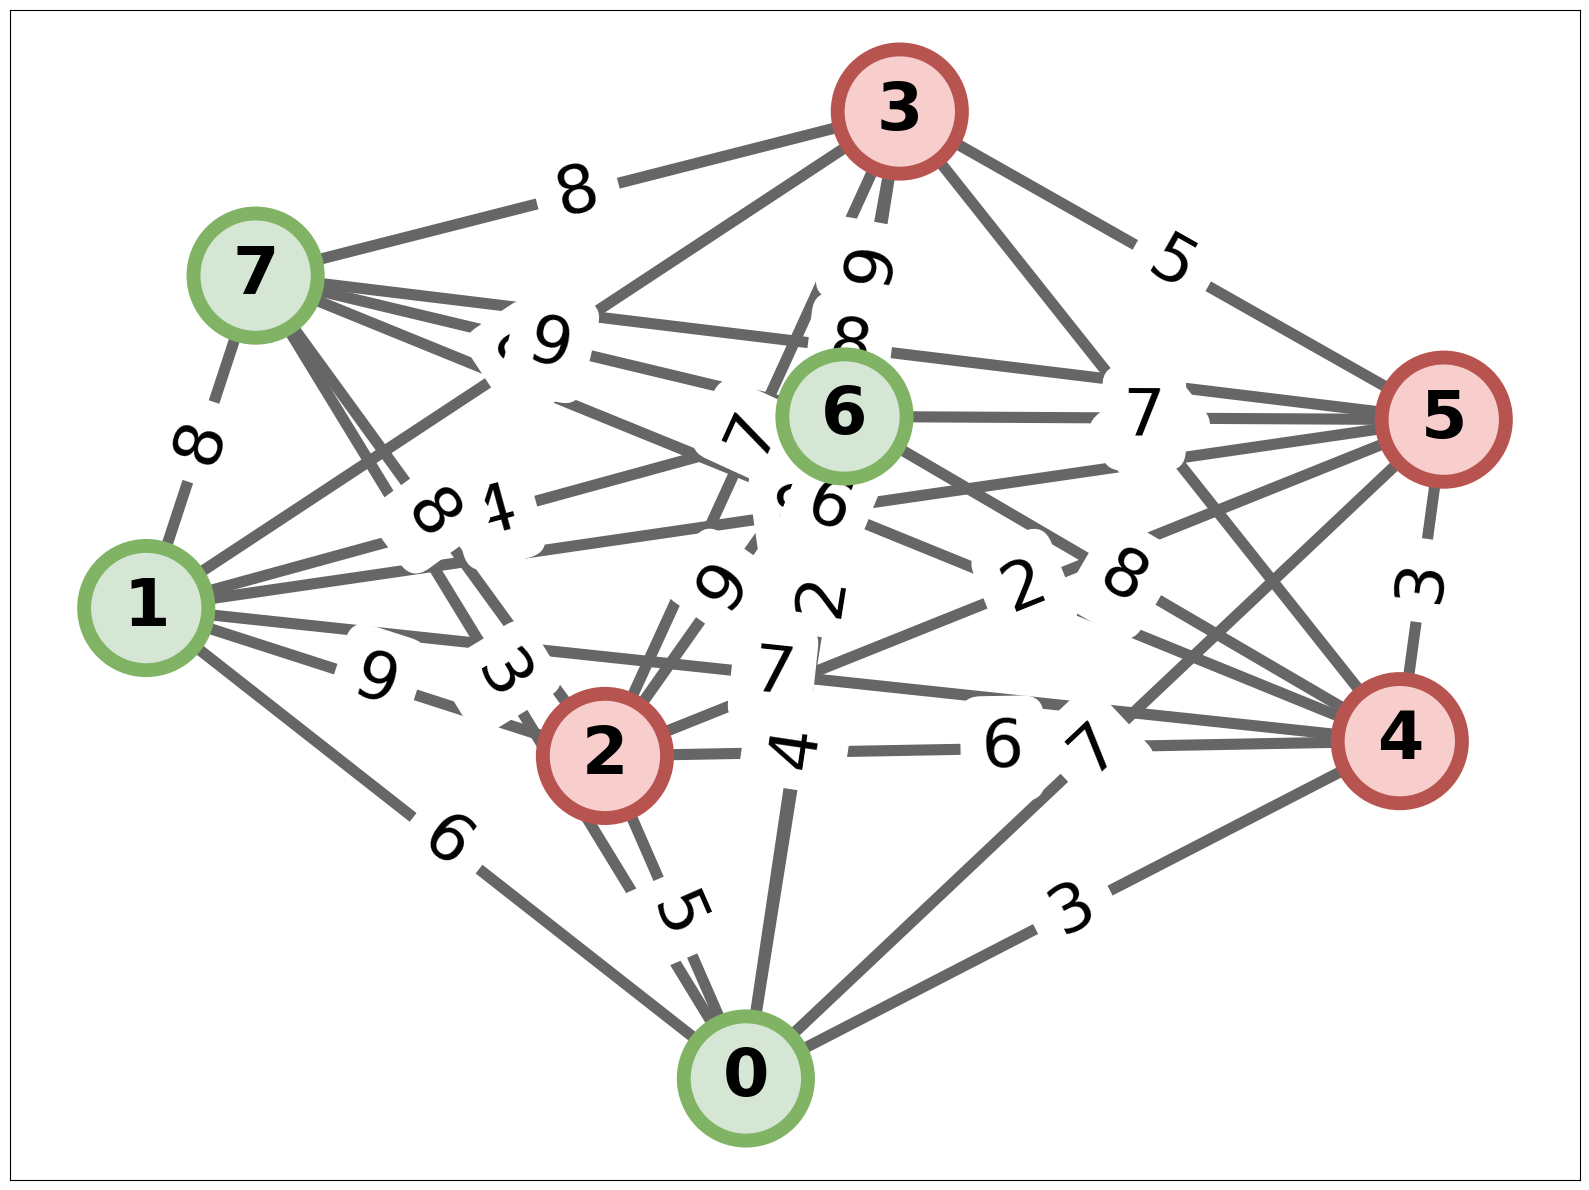

In [83]:
problem_description = eval(dfs[0]['problem'][0])
problem_description
problem = qtee.ProblemGenerator.from_dict(problem_description)
plt = problem.visualize_problem()
plt.savefig(f'plots/problem_{problem_number}.pdf')
plt.show()

plt = problem.visualize_solution()
plt.savefig(f'plots/solution_{problem_number}.pdf')
plt.show()


In [84]:
best_solution = problem.solution
best_solution

([0, 0, 1, 1, 1, 1, 0, 0], 112.0)

In [86]:
solution_30 = eval(dfs[28]['solutions'][0]) 
sum_of_scores = 0
for solution in solution_30:
    solution_string = solution[0]
    reverse_string = solution_string[::-1]
    # print(reverse_string)
    score = problem.quadratic_program.objective.evaluate(reverse_string)
    sum_of_scores += score
    # sum_of_scores += solution[1]
    # print(solution[1])
print(sum_of_scores)
length = len(solution_30)
print(sum_of_scores/length)

9217.0
92.17


[1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 0, 1]


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/qaoa/lib/python3.10/site-packages/matplotlib/pyplot.py'>

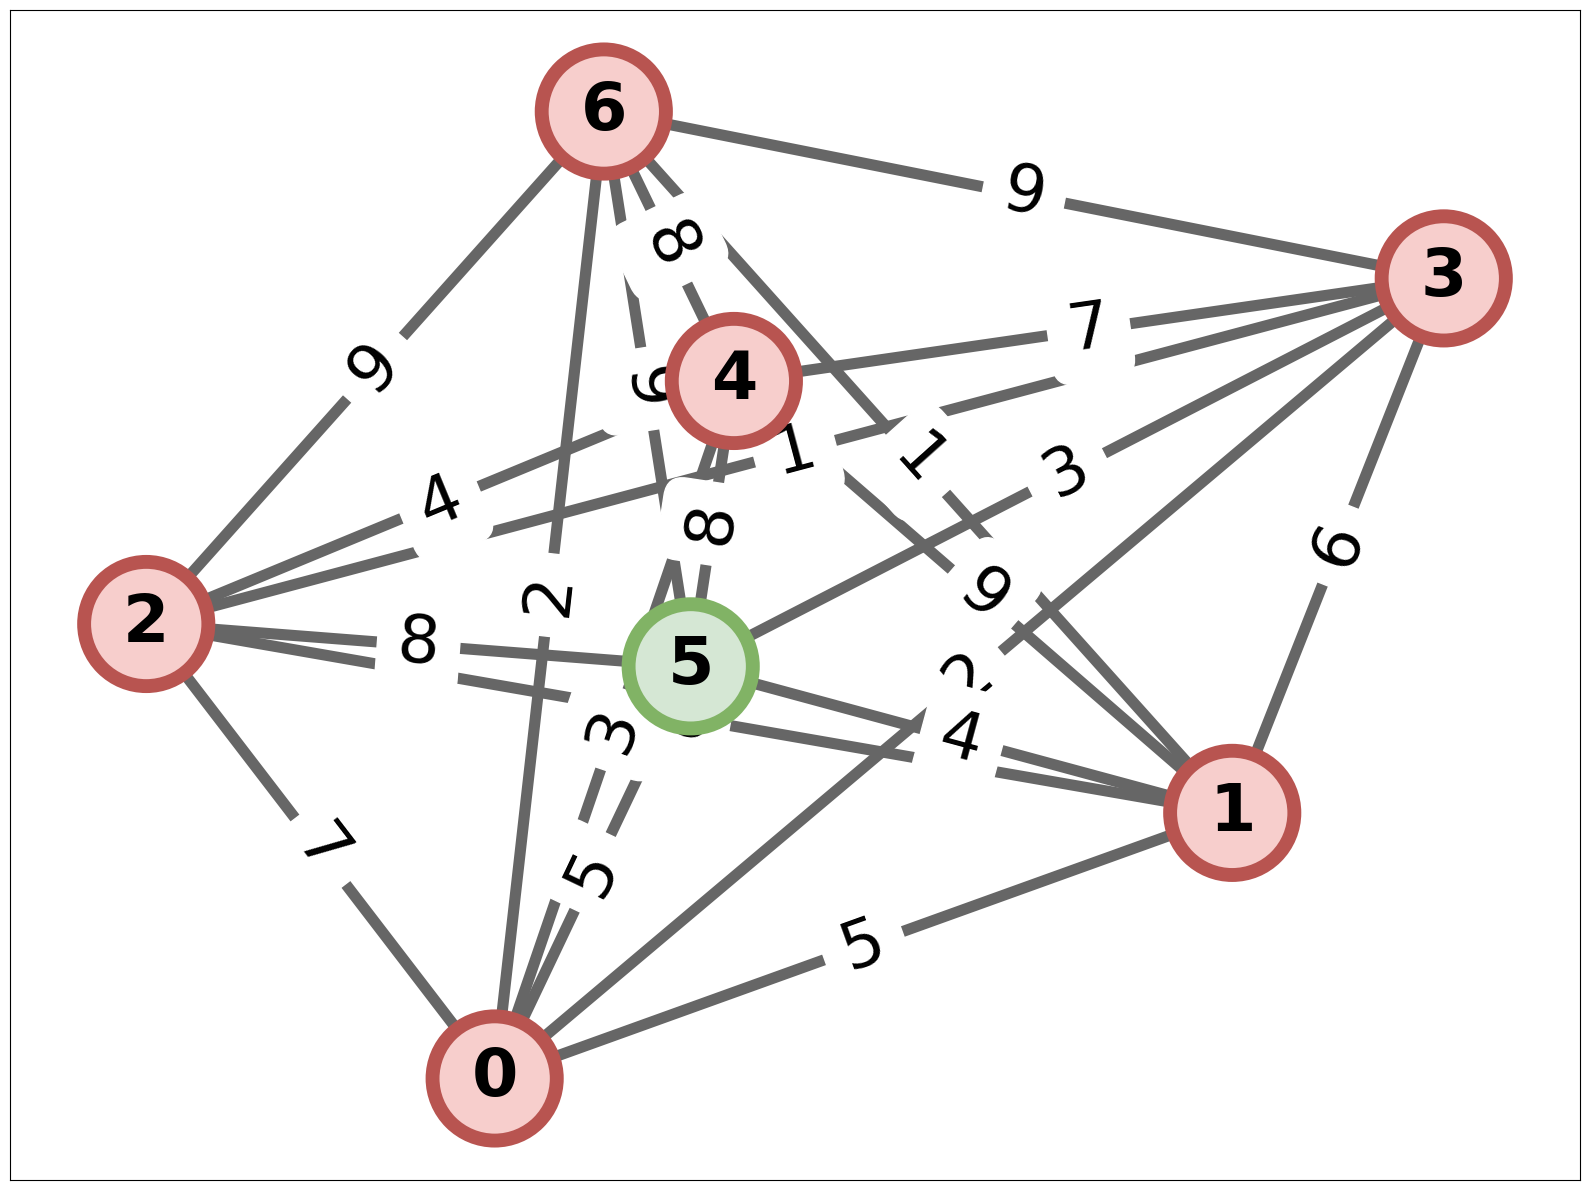

In [ ]:
solution_string = eval(dfs[29]['solutions'][0])[0][0]
# reverse the string
solution_string = solution_string[::-1]
print(solution_string)
problem.visualize_solution((solution_string, 30))

In [ ]:
avg_scores = pd.DataFrame(columns=['layer', 'score', 'time'])
for df in dfs:
    scores = eval(df['solutions'][0])
    solution_strings = [score[0] for score in scores]
    reverse_strings = [solution_string[::-1] for solution_string in solution_strings]
    scores = [problem.quadratic_program.objective.evaluate(reverse_string) for reverse_string in reverse_strings]
    avg_score = sum(scores)/len(scores)
    layer = int(df['layers'][0])
    times = eval(df['time'][0])
    avg_time = sum(times)/len(times)
    avg_scores.loc[len(avg_scores)] = [layer, avg_score, avg_time]
    

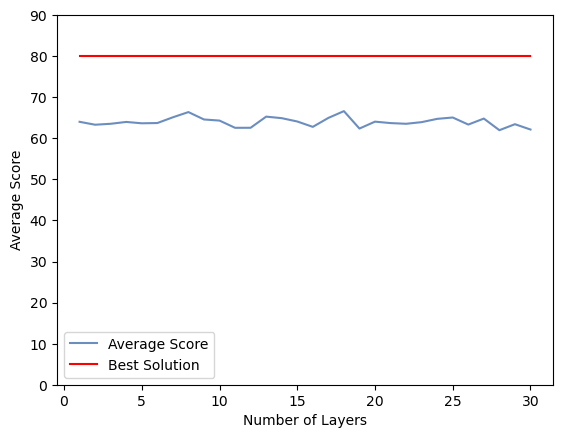

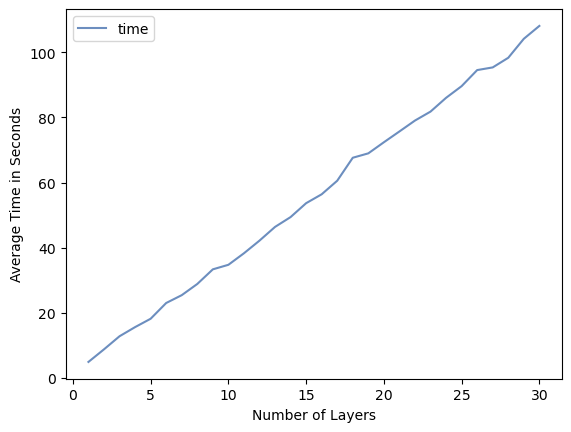

In [ ]:
colors = qtee.utils.custom_colors 
avg_scores.plot(x='layer', y='score', color=colors['blue']['dark'])
# add a red line for the best solution
import matplotlib.pyplot as plt
point1 = (1, best_solution[1])
point2 = (max_layers, best_solution[1])
max_value_line = [point1, point2]
plt.plot(*zip(*max_value_line), color='red')
# the red line should start at x=0 and end at x=max_layers
plt.xlabel('Number of Layers')
plt.ylabel('Average Score')
plt.legend(['Average Score', 'Best Solution'])
# the y axis has to include 0 to max score
plt.ylim(0, best_solution[1]+10)
plt.savefig(f'plots/score_{problem_number}.pdf')
plt.show()
avg_scores.plot(x='layer', y='time', color=colors['blue']['dark'])
plt.xlabel('Number of Layers')
plt.ylabel('Average Time in Seconds')
plt.savefig(f'plots/time_{problem_number}.pdf')

(0.0, 110.0)

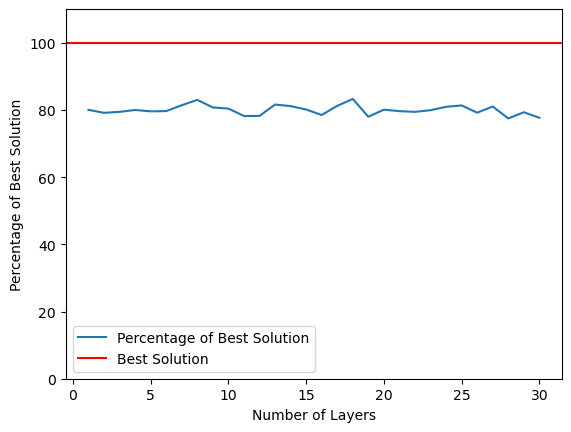

In [ ]:
# lets assume the maximum score to be 100% and calculate the percentage of the average score
avg_scores['percentage'] = avg_scores['score']/best_solution[1]*100
avg_scores.plot(x='layer', y='percentage')
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel('Number of Layers')
plt.ylabel('Percentage of Best Solution')
plt.legend(['Percentage of Best Solution', 'Best Solution'])
plt.ylim(0, 110)

In [13]:
noisy_files_in_dir = os.listdir(f'results_maxcut_{problem_number}/noisy')
noisy_files_in_dir = [file for file in noisy_files_in_dir if file.endswith('.csv')]
noisy_files_in_dir[:5]

['results_noisy_4_64.csv',
 'results_noisy_16_73.csv',
 'results_noisy_4_70.csv',
 'results_noisy_16_67.csv',
 'results_noisy_3_79.csv']

In [14]:
dfs_noisy = []
for layer in range(1, max_layers+1):
    for i in range(1, repetition+1):
        file_name = f'results_noisy_{layer}_{i}.csv'
        if file_name in noisy_files_in_dir:
            df = pd.read_csv(f'results_maxcut_{problem_number}/noisy/{file_name}')
            dfs_noisy.append(df)

In [ ]:
dfs_noisy[2].head()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 0, 1, 1, 1, 0], -79.0)]","[array([-0.03772912, 5.49928528])]",[110.38052654266357]


In [ ]:
# merge all the dataframes into one
df_noisy = pd.concat(dfs_noisy)
df_noisy


,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 1, 1, 1, 1, 1, 0], -72.0)]","[array([5.16084691, 3.63502199])]",[181.78518676757812]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 1, 0, 1, 0, 1, 1, 0], -96.0)]","[array([6.50553388, 4.19398073])]",[126.52083683013916]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 0, 1, 1, 1, 0], -79.0)]","[array([-0.03772912, 5.49928528])]",[110.38052654266357]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 1, 0, 1, 1], -77.0)]","[array([5.71650767, 6.13688086])]",[195.98021626472473]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 1, 1, 0, 0, 1, 1, 1], -103.0)]","[array([0.51772031, 4.33328829])]",[174.33916115760803]
...,...,...,...,...,...,...,...
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 1, 1, 1, 0, 0, 0, 0], -87.0)]","[array([1.20823923, 0.63701048, 1.96664156, 5....",[1650.5678901672363]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 0, 0, 1, 0, 0, 0], -60.0)]","[array([0.67468334, 4.46584195, 5.96563701, 2....",[1648.4593062400818]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 1, 0, 0, 1, 1, 1], -80.0)]","[array([5.05282626, 5.85573185, 3.47845351, 3....",[1611.6120390892029]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 0, 0, 0, 0, 0, 1], -64.0)]","[array([3.32705942e+00, 7.42570099e-01, 3.5834...",[1652.9159545898438]


In [ ]:
eval(df_noisy['solutions'].iloc[0])[0][1]
# df_noisy['solutions'].apply(lambda x: print(eval(x)[0]))
df_noisy.tail()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 1, 1, 1, 0, 0, 0, 0], -87.0)]","[array([1.20823923, 0.63701048, 1.96664156, 5....",[1650.5678901672363]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 0, 0, 1, 0, 0, 0], -60.0)]","[array([0.67468334, 4.46584195, 5.96563701, 2....",[1648.4593062400818]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 1, 0, 0, 1, 1, 1], -80.0)]","[array([5.05282626, 5.85573185, 3.47845351, 3....",[1611.6120390892029]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 0, 0, 0, 0, 0, 1], -64.0)]","[array([3.32705942e+00, 7.42570099e-01, 3.5834...",[1652.9159545898438]
0,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 1, 0, 1, 0, 1], -76.0)]","[array([5.316733 , 0.02702726, 2.2620092 , 1....",[1640.6503188610077]


In [ ]:
#give every row a unique index
df_noisy.reset_index(drop=True, inplace=True)
df_noisy.tail()

,Unnamed: 0,problem,layers,optimizer,solutions,parameters,time
2995,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 1, 1, 1, 0, 0, 0, 0], -87.0)]","[array([1.20823923, 0.63701048, 1.96664156, 5....",[1650.5678901672363]
2996,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 0, 0, 1, 0, 0, 0], -60.0)]","[array([0.67468334, 4.46584195, 5.96563701, 2....",[1648.4593062400818]
2997,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 1, 0, 0, 1, 1, 1], -80.0)]","[array([5.05282626, 5.85573185, 3.47845351, 3....",[1611.6120390892029]
2998,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 1, 0, 0, 0, 0, 0, 0, 1], -64.0)]","[array([3.32705942e+00, 7.42570099e-01, 3.5834...",[1652.9159545898438]
2999,0,"{'type': 'maxcut', 'graph': {'directed': False...",30,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 0, 1, 1, 1, 0, 1, 0, 1], -76.0)]","[array([5.316733 , 0.02702726, 2.2620092 , 1....",[1640.6503188610077]


In [ ]:
def find_problematic_row(df, column):
    problematic_rows = []
    for index, value in df[column].items():
        try:
            eval(value)
        except Exception as e:
            problematic_rows.append((index, value, str(e)))
    return problematic_rows

In [ ]:
problematic_rows = find_problematic_row(df_noisy, 'solutions')

problematic_rows

[]

In [ ]:
# drop column unnamed 0 parameters
df_noisy.drop(columns='Unnamed: 0', inplace=True)
df_noisy.head()


,problem,layers,optimizer,solutions,parameters,time
0,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 1, 1, 1, 1, 1, 0], -72.0)]","[array([5.16084691, 3.63502199])]",[181.78518676757812]
1,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 1, 0, 1, 0, 1, 1, 0], -96.0)]","[array([6.50553388, 4.19398073])]",[126.52083683013916]
2,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 0, 1, 0, 1, 1, 1, 0], -79.0)]","[array([-0.03772912, 5.49928528])]",[110.38052654266357]
3,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([1, 1, 0, 0, 1, 1, 0, 1, 1], -77.0)]","[array([5.71650767, 6.13688086])]",[195.98021626472473]
4,"{'type': 'maxcut', 'graph': {'directed': False...",1,"{'optimizer': 'COBYLA', 'maxiter': 100, 'shots...","[([0, 0, 1, 1, 0, 0, 1, 1, 1], -103.0)]","[array([0.51772031, 4.33328829])]",[174.33916115760803]


In [ ]:
def create_summary_dataframe(df):
    layers = df['layers'].unique()
    summary_df = pd.DataFrame(columns=['layer', 'avg_score', 'avg_time'])
    for layer in layers:
        layer_df = df[df['layers'] == layer]
        scores = layer_df['solutions'].apply(lambda x: eval(x)[0][1])
        avg_score = scores.mean()
        times = layer_df['time'].apply(lambda x: eval(x)[0])
        avg_time = times.mean()
        summary_df.loc[len(summary_df)] = [layer, -avg_score, avg_time]

    return summary_df


summary_df = create_summary_dataframe(df_noisy)

In [ ]:
summary_df


,layer,avg_score,avg_time
0,1.0,82.38,143.226082
1,2.0,84.14,278.097969
2,3.0,81.48,422.432651
3,4.0,82.78,565.623023
4,5.0,78.85,688.698842
5,6.0,82.83,771.576674
6,7.0,77.72,824.178385
7,8.0,80.70,862.377758
8,9.0,80.93,898.049912
9,10.0,82.17,940.562669


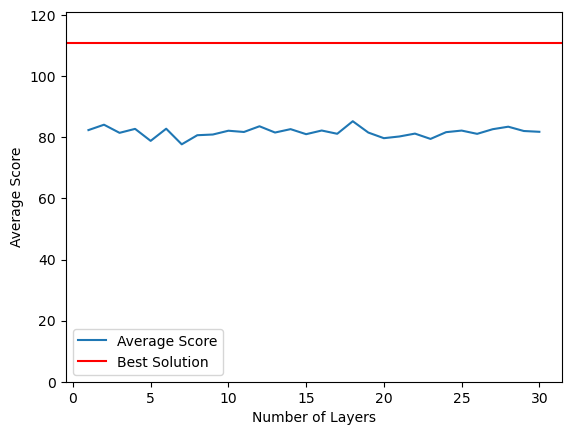

Text(0, 0.5, 'Average Time in Seconds')

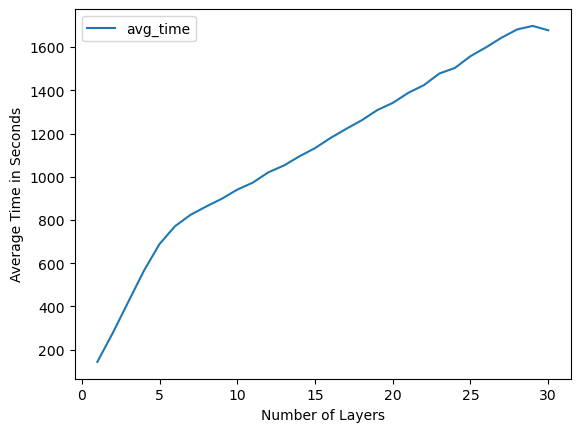

In [ ]:
summary_df.plot(x='layer', y='avg_score')
# add a red line for the best solution
import matplotlib.pyplot as plt
plt.axhline(y=best_solution[1], color='r', linestyle='-')
# the red line should start at x=0 and end at x=max_layers
plt.xlabel('Number of Layers')
plt.ylabel('Average Score')
plt.legend(['Average Score', 'Best Solution'])
# the y axis has to include 0 to max score
plt.ylim(0, best_solution[1]+10)
plt.show()
summary_df.plot(x='layer', y='avg_time')
plt.xlabel('Number of Layers')
plt.ylabel('Average Time in Seconds')

(0.0, 110.0)

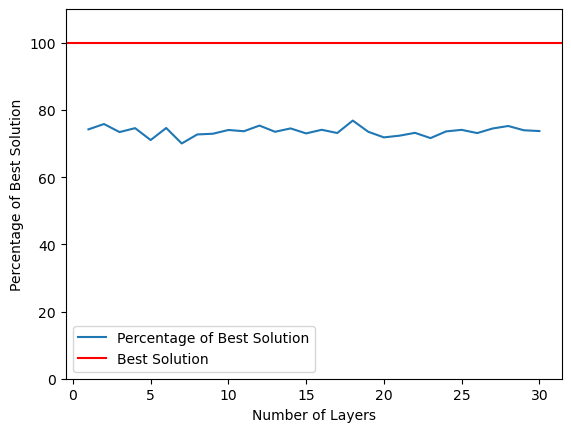

In [ ]:
# lets assume the maximum score to be 100% and calculate the percentage of the average score
summary_df['percentage'] = summary_df['avg_score']/best_solution[1]*100
summary_df.plot(x='layer', y='percentage')
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel('Number of Layers')
plt.ylabel('Percentage of Best Solution')
plt.legend(['Percentage of Best Solution', 'Best Solution'])
plt.ylim(0, 110)